In [1]:
#  **Softmax Regression, One-vs-All and One-vs-One for Multi-class Classification**


In [2]:
!pip install scikit-learn==1.0.2

     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB 435.7 kB/s eta 0:00:16
     ---------------------------------------- 0.0/6.7 MB 393.8 kB/s eta 0:00:17
     ---------------------------------------- 0.1/6.7 MB 573.4 kB/s eta 0:00:12
      --------------------------------------- 0.1/6.7 MB 714.4 kB/s eta 0:00:10
     - -------------------------------------- 0.2/6.7 MB 871.5 kB/s eta 0:00:08
     - -------------------------------------- 0.3/6.7 MB 1.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.4/6.7 MB 1.2 MB/s eta 0:00:06
     --- ------------------------------------ 0.5/6.7 MB 1.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/6.7 MB 1.4 MB/s eta 0:00:05
     ---- ----------------------------------- 0.7/6.7 MB 1.5 MB/s eta 0:00:04
     ----- ---------------------------------- 0.9/6.7 MB 1.7 MB/s et

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "D:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "D:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "D:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\Anaconda\Lib\importlib\__init__.py",

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [4]:
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


In [5]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In [10]:
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

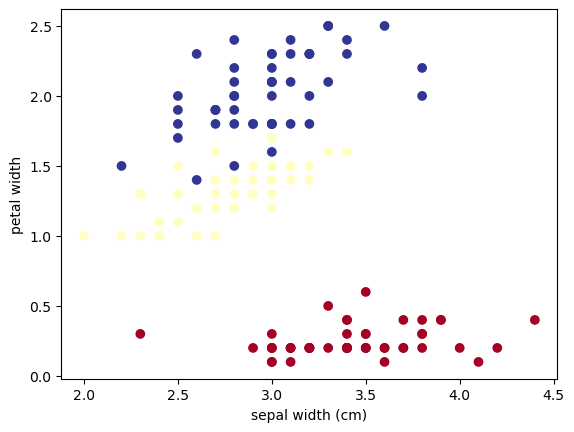

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

In [14]:
lr = LogisticRegression(random_state=0).fit(X, y)

In [16]:
probability=lr.predict_proba(X)


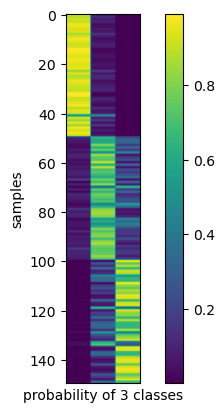

In [18]:
plot_probability_array(X,probability)

In [20]:
probability[0,:]

array([9.57579132e-01, 4.23242810e-02, 9.65866230e-05])

In [22]:
probability[0,:].sum()

1.0000000000000002

In [24]:
probability[0,:]

array([9.57579132e-01, 4.23242810e-02, 9.65866230e-05])

In [26]:
np.argmax(probability[0,:])

0

In [32]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [30]:
yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

In [ ]:
pairs=[]
left_overs=classes_.copy()
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before 
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)
        #find classes in pair 
        select=np.logical_or(y==class_ , y==second_class)
        #train model 
        model=SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select,:],y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples. 
        decision_boundary (X[select,:],y[select],model,iris,two=True)
   
        
    